<a href="https://www.kaggle.com/code/kaop11/mentalhealth-eda-xgboost?scriptVersionId=206105329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Dataset Introduction: Mental Health and Lifestyle Data

## Overview
This dataset contains information about individuals' mental health and lifestyle factors, collected for the purpose of analyzing relationships between various aspects of life and mental health indicators such as depression.

## Dataset Structure
The dataset consists of **140,700 entries** and **20 columns**. Each row represents an individual, with attributes detailing personal demographics, lifestyle choices, and mental health indicators.

### Columns Description
1. **id**: Unique identifier for each individual.
2. **Name**: Name of the individual (for privacy reasons, this may be anonymized in analysis).
3. **Gender**: Gender of the individual (e.g., Male, Female).
4. **Age**: Age of the individual in years.
5. **City**: City of residence.
6. **Working Professional or Student**: Indicates whether the individual is a working professional or a student.
7. **Profession**: The profession of(if applicable).
8. **Academic Pressure**: The level of academic pres (if applicable).
9. **Work Pressure**: The level of work pred (if applicable).
10. **CGPA**: Cumulative Grade Point Average, a measure of acce (if applicable).
11. **Study Satisfaction**: Level of satisfaction with studies (on a scale).
12. **Job Satisfaction**: Level of satisfaction  job (if applicable).
13. **Sleep Duration**: Duration of sleep categorized (e.g., "Less than 5 hours", "5-6 hours").
14. **Dietary Habits**: Describes the individual's dietary habits (e.g., Healthy, Unhealthy).
15. **Degree**: ttained (if applicable).
16. **Have you ever had suicidal thoughts?**: Indicates whether the individual has had suicidal thoughts (Yes/No).
17. **Work/Study Hours**: Number of hours spent on work or study per week.
18. **Financial Stress**: Level of financial stress experienced.
19. **Family History of Mental Illness**: Indicates whether there is a family history of mental illness (Yes/No).
20. **Depression**: A binary indicator (0 or 1) indicating the presence of depression.

## Usage
This dataset can be used for various analyses, including:
- Understanding the impact of lifestyle factors on mental health.
- Identifying trends and correlations between academic/work pressure and depression.
- Developing predictive models to assess the likelihood of depression based on various attributes.

## Data Quality
Before analysis, the dataset may require cleaning, including handling missing values, encoding categorical variables, and scaling numerical features.


## EDA

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
train_data_path = "/kaggle/input/playground-series-s4e11/train.csv"
test_data_path = "/kaggle/input/playground-series-s4e11/test.csv"

# Load the CSV file
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path )
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [3]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
train_df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [5]:
train_df.nunique()

id                                       140700
Name                                        422
Gender                                        2
Age                                          43
City                                         98
Working Professional or Student               2
Profession                                   64
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        331
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               36
Dietary Habits                               23
Degree                                      115
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64

In [6]:
train_df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

In [7]:
train_df['City'].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Kagan             1
Armaan            1
Ithal             1
Jhanvi            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [8]:
train_df['Name'].value_counts()

Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035
            ... 
Parvik         1
Vlaan          1
Mahak          1
Abishma        1
A.Ed           1
Name: count, Length: 422, dtype: int64

In [9]:
train_df['Profession'].value_counts()

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
Moderate              1
Analyst               1
Pranav                1
Visakhapatnam         1
Yuvraj                1
Name: count, Length: 64, dtype: int64

### Clean Data

In [10]:
import pandas as pd

def clean_data(df, threshold = 100):
    # Make a copy of the DataFrame to preserve the original
    df_cleaned = df.copy()
    
    # Nested function to clean and map Sleep Duration values
    def clean_sleep_duration(value):
        if "Less than 5 hours" in value or any(x in value for x in ["1-4", "2-4", "3-4", "4-5"]):
            return "Less than 5 hours"
        elif any(x in value for x in ["5-6", "5", "6"]):
            return "5-6 hours"
        elif "7-8" in value or "8" in value:
            return "7-8 hours"
        elif "More than 8 hours" in value or any(x in value for x in ["9", "10", "11"]):
            return "More than 8 hours"
        else:
            return "Unknown"

    # Clean the Sleep Duration column and map it to numerical categories
    df_cleaned['Sleep Duration'] = df_cleaned['Sleep Duration'].apply(clean_sleep_duration)
    
    
    # Loop through each column of type object or category to process "noise"
    for col in df_cleaned.select_dtypes(include=['object', 'category']):
        # Calculate the frequency of each value in the column
        value_counts = df_cleaned[col].value_counts()
        
        # Identify values to keep (frequency > threshold)
        to_keep = value_counts[value_counts > threshold].index
        
        # Replace "noise" values with "Unknown"
        df_cleaned[col] = df_cleaned[col].where(df_cleaned[col].isin(to_keep), other="Unknown")
    
        
    # Fill all remaining null values in the DataFrame with NaN
    df_cleaned = df_cleaned.fillna(pd.NA)
    
    return df_cleaned

# Use the clean_data function on train_df
train_df_cleaned = clean_data(train_df, threshold= 100)
test_df_cleaned = clean_data(test_df, threshold = 100)

In [11]:
train_df_cleaned.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,7-8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Unknown,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


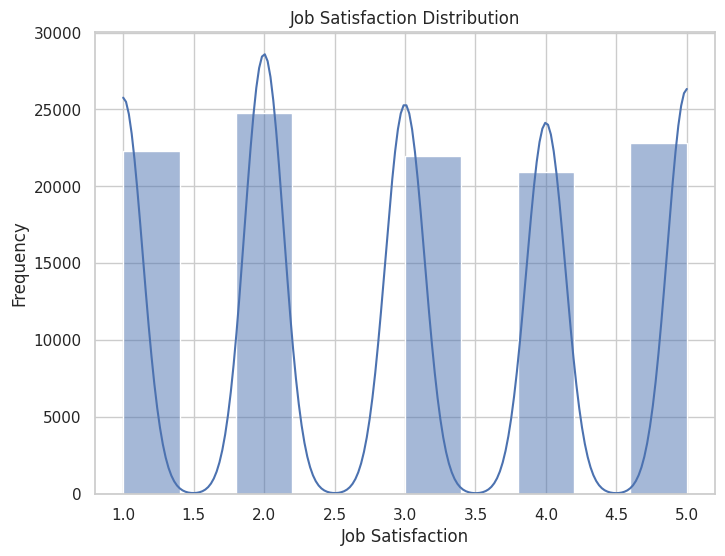

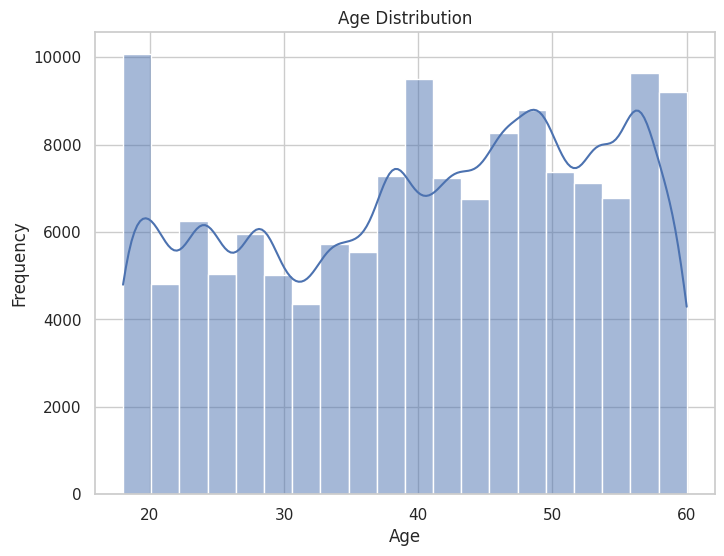

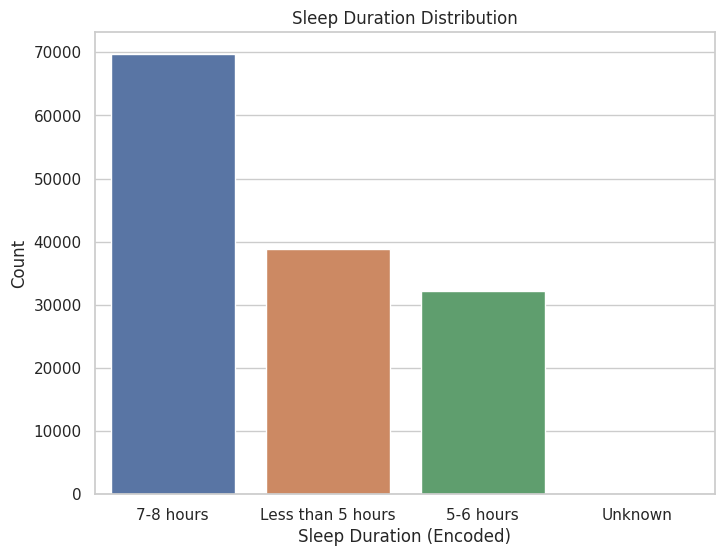

In [12]:
# Set up the plot style
sns.set(style="whitegrid")

# Plot the distribution of Job Satisfaction
plt.figure(figsize=(8, 6))
sns.histplot(train_df_cleaned['Job Satisfaction'].dropna(), bins=10, kde=True)
plt.title("Job Satisfaction Distribution")
plt.xlabel("Job Satisfaction")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(train_df_cleaned['Age'].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of Sleep Duration (assuming it has been cleaned and encoded)
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df_cleaned, x='Sleep Duration')
plt.title("Sleep Duration Distribution")
plt.xlabel("Sleep Duration (Encoded)")
plt.ylabel("Count")
plt.show()

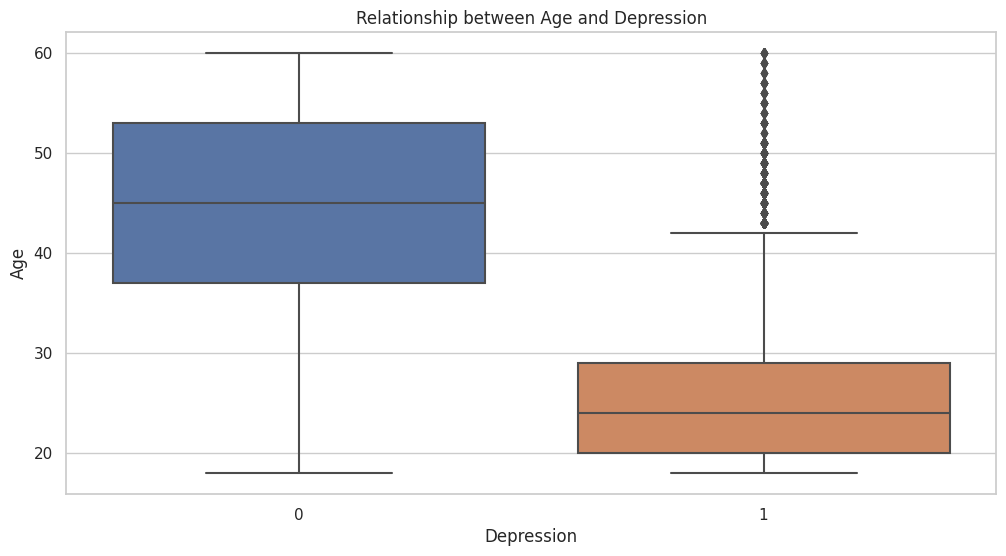

In [13]:
# Analyze the relationship between some variables
plt.figure(figsize=(12, 6))

# Relationship between Age and Depression
sns.boxplot(x='Depression', y='Age', data=train_df_cleaned)
plt.title('Relationship between Age and Depression')
plt.show()

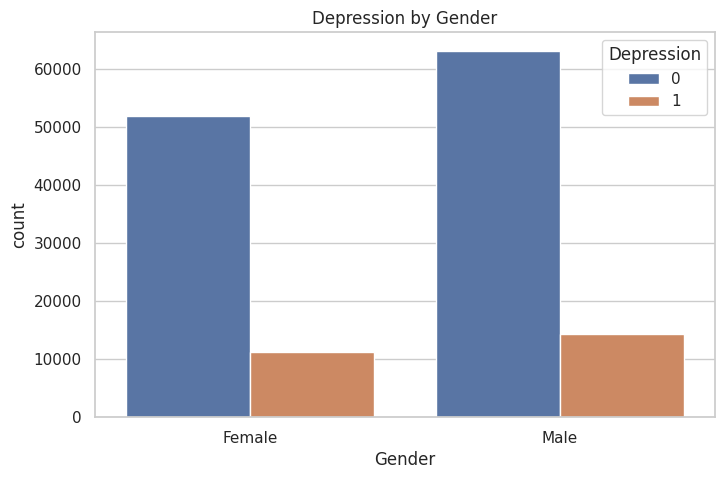

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Depression', data=train_df_cleaned)
plt.title('Depression by Gender')
plt.show()

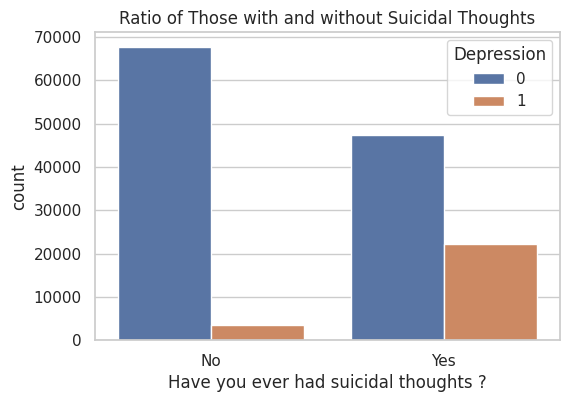

In [15]:
#  Visualize the ratio of those with and without suicidal thoughts
plt.figure(figsize=(6, 4))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=train_df_cleaned)
plt.title('Ratio of Those with and without Suicidal Thoughts')
plt.show()


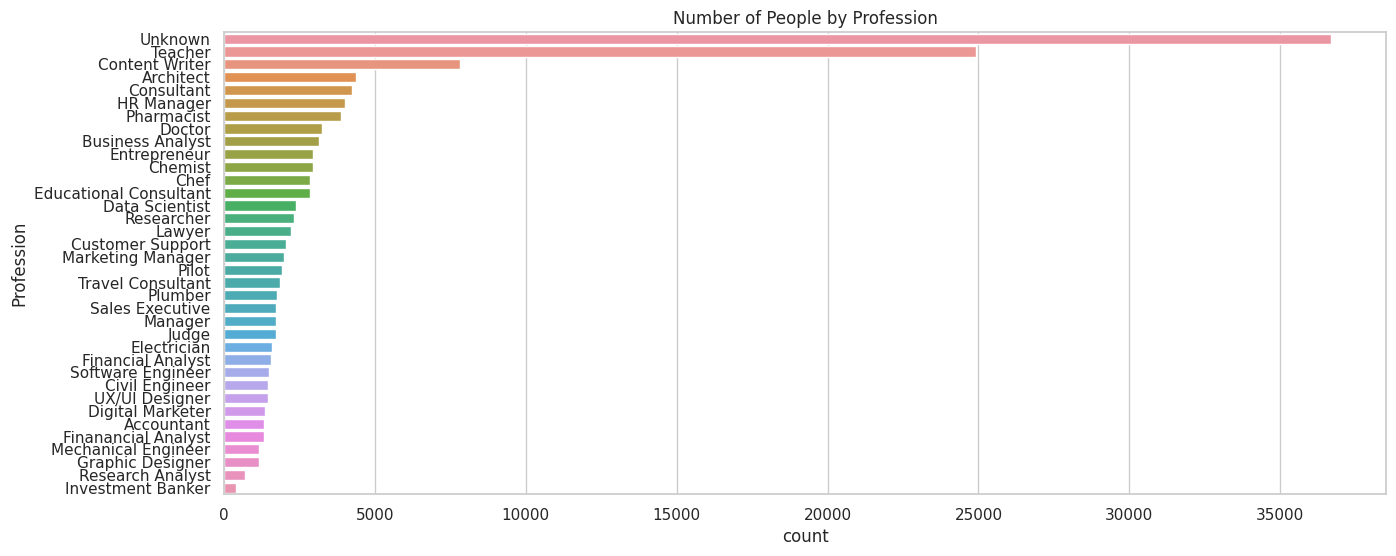

In [16]:
plt.figure(figsize=(15, 6))
sns.countplot(y='Profession', data=train_df_cleaned, order=train_df_cleaned['Profession'].value_counts().index)
plt.title('Number of People by Profession')
plt.show()

## PREPARE DATA

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_cleaned = df.copy()
    
    # Drop the 'id' column
    if 'id' in df_cleaned.columns:
        df_cleaned.drop(columns=['id'], inplace=True)

    # Fill missing values with "Unknown" for categorical columns
    for col in df_cleaned.select_dtypes(include=['object', 'category']):
        df_cleaned[col].fillna("Unknown", inplace=True)

    # Convert categorical variables to numerical using Label Encoding
    for col in df_cleaned.select_dtypes(include=['object', 'category']):
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col])

    return df_cleaned

# Example usage:
train_df_transformed = preprocess_data(train_df_cleaned)
test_df_transformed = preprocess_data(test_df_cleaned)

In [18]:
train_df_transformed.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,4,0,49.0,15,1,3,NaN,5.0,NaN,NaN,2.0,1,0,9,0,1.0,2.0,0,0
1,200,1,26.0,28,1,32,NaN,4.0,NaN,NaN,3.0,2,2,12,1,7.0,3.0,0,1
2,206,1,33.0,30,0,35,5.0,NaN,8.97,2.0,NaN,0,0,3,1,3.0,1.0,0,1
3,206,1,22.0,17,1,32,NaN,5.0,NaN,NaN,1.0,2,1,6,1,10.0,1.0,1,1
4,138,0,30.0,12,1,2,NaN,1.0,NaN,NaN,1.0,0,2,6,1,9.0,4.0,1,0


## MODELING

### Optimizing an XGBoost model with Optuna

In [19]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# import optuna

# # Assuming the train_df_transformed dataset has been provided and prepared
# X = train_df_transformed.drop(columns=['Depression'], errors='ignore')
# y = train_df_transformed['Depression']

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# # Objective function for Optuna optimization
# def objective(trial):
#     # Define the hyperparameters to optimize
#     params = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'use_label_encoder': False,
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'reg_lambda': trial.suggest_loguniform('lambda', 1e-8, 10.0),
#         'reg_alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0),
#         'early_stopping_rounds': 50  # Set early stopping here instead of in fit
#     }

#     # Initialize the XGBoost model
#     model = xgb.XGBClassifier(**params)

#     # Train the model
#     model.fit(
#         X_train_scaled, y_train,
#         eval_set=[(X_val_scaled, y_val)],
#         verbose=False
#     )
    
#     # Predict and calculate accuracy
#     y_pred = model.predict(X_val_scaled)
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Create a study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Print the best results
# best_params = study.best_params
# best_accuracy = study.best_value
# print("Best parameters:", best_params)
# print("Best accuracy:", best_accuracy)


Accuracy: 0.9395167022032693


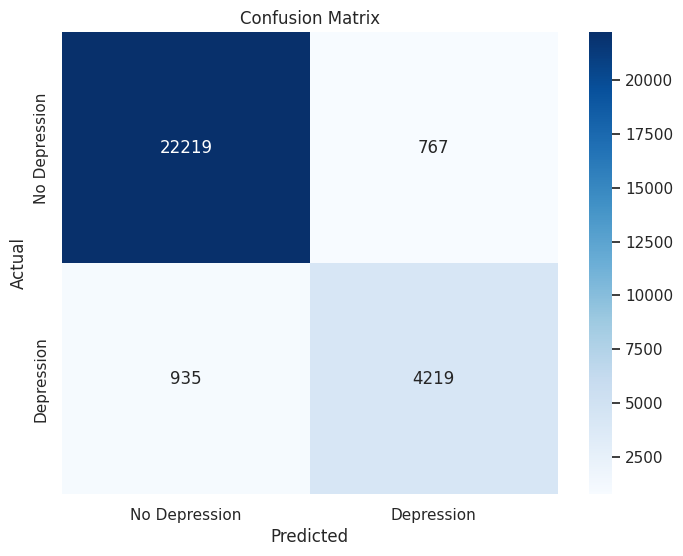

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.85      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140



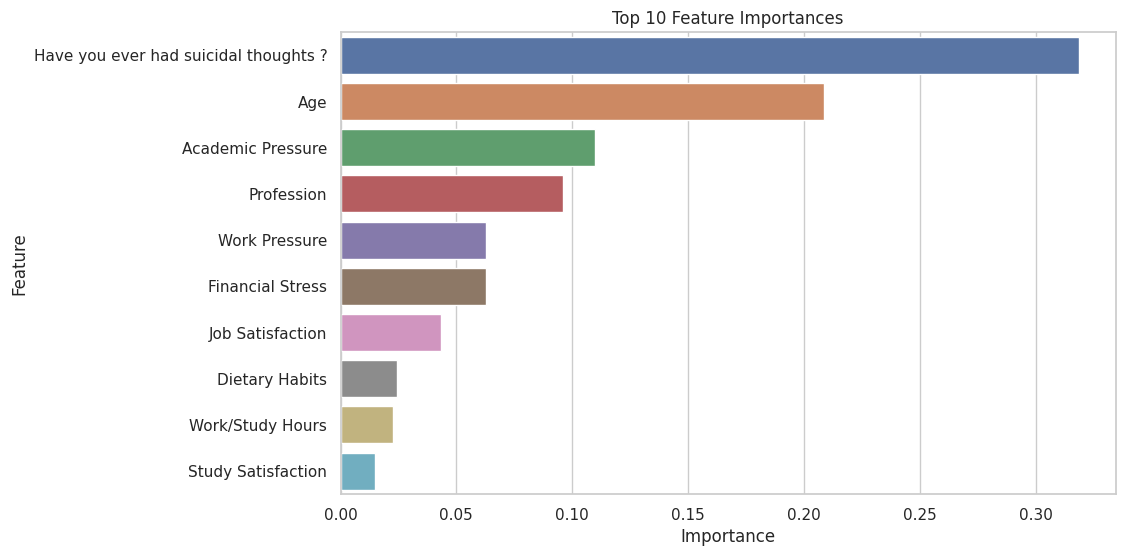

In [20]:
# Prepare the data
X = train_df_transformed.drop(columns=['Depression'], errors='ignore')
y = train_df_transformed['Depression']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Best parameters for XGBoost (from previous tuning)
best_params = {
    'max_depth': 4,
    'learning_rate': 0.0693,
    'n_estimators': 259,
    'subsample': 0.7839,
    'colsample_bytree': 0.5892,
    'lambda': 0.4028,
    'alpha': 0.6463,
    'random_state': 42
}

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(**best_params)
model.fit(X_train_scaled, y_train)

# Make predictions with the trained model
y_pred = model.predict(X_val_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Depression', 'Depression'], 
            yticklabels=['No Depression', 'Depression'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_val, y_pred))

# Calculate feature importances
importances = model.feature_importances_
feature_names = X.columns  # Feature names from the original DataFrame

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))  # Show the top 10 most important features
plt.title('Top 10 Feature Importances')
plt.show()


In [21]:
# Make predictions on the test data
X_test = test_df_transformed
X_test_scaled = scaler.transform(X_test) 

y_test_pred = model.predict(X_test_scaled)  

predictions_df = pd.DataFrame({
    'id': test_df_cleaned['id'],  
    'Depression': y_test_pred  
})

predictions_df.to_csv('predictions_test.csv', index=False)
print("Predictions have been saved to predictions_test.csv")


Predictions have been saved to predictions_test.csv


In [22]:
predictions_df

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1
